# Question that I want to answer from this exploration
1. People who get likes the most
2. People who post the most
2. Is the people who send many posts also get many likes?
3. On what month people usually send post the most?
4. Is good for posting post sequential? Based on like score

In [579]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Instagram_Data.csv')


## Analysis the data first


In [578]:
df.describe()
df.isnull().any()
df.dtypes

User uuid                           int64
Likes                               int64
Days passed from post               int64
Likes Score                       float64
Type                               object
Numer of Tags                       int64
Numer of Comments                   int64
Date Posted                        object
Year                                int64
Month                               int64
Day                                 int64
Hour                                int64
Minute                              int64
Formatted Date Posted              object
day_passed_related_likes_score       bool
dtype: object

## 1. People who get likes the most

In [581]:
jumlah_like_df = df.groupby(['User uuid'])['Likes'].sum().reset_index()
jumlah_like_df.sort_values(by='Likes', ascending=False)

,User uuid,Likes
697,698,940939106
332,333,482802384
126,127,404650194
146,147,393906111
134,135,292503813
...,...,...
1029,1030,135
772,773,98
989,990,71
780,781,54


### What is the profile of likes that people get

In [582]:
jumlah_like_df.describe()

,User uuid,Likes
count,1089.000000,1.089000e+03
mean,545.000000,7.062910e+06
std,314.511526,4.111295e+07
min,1.000000,3.400000e+01
25%,273.000000,1.793600e+04
50%,545.000000,1.699760e+05
75%,817.000000,1.893114e+06
max,1089.000000,9.409391e+08


### This is the histogram of the likes

In [86]:
clip_max = 10000

def clipping(df_per_row, clip_max):
    if df_per_row['Likes'] > clip_max:
        return clip_max
    else:
        return df_per_row['Likes']

In [87]:
jumlah_like_df['clipped_Likes'] = jumlah_like_df.apply(lambda x: clipping(x, clip_max), axis=1)

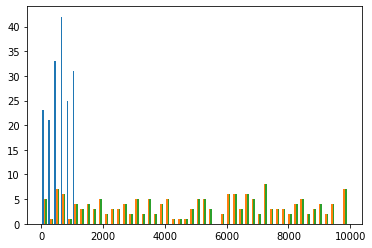

In [95]:
df_to_plot = jumlah_like_df[jumlah_like_df['Likes']<10000]

plt.hist(df_to_plot, bins=50)
plt.show()

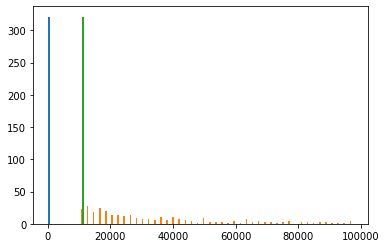

In [96]:
df_to_plot = jumlah_like_df[(jumlah_like_df['Likes']>10000) & (jumlah_like_df['Likes']<100000)]

plt.hist(df_to_plot, bins=50)
plt.show()

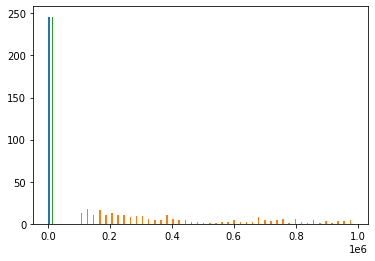

In [97]:
df_to_plot = jumlah_like_df[(jumlah_like_df['Likes']>100000) & (jumlah_like_df['Likes']<1000000)]

plt.hist(df_to_plot, bins=50)
plt.show()

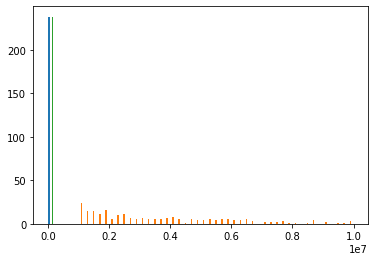

In [98]:
df_to_plot = jumlah_like_df[(jumlah_like_df['Likes']>1000000) & (jumlah_like_df['Likes']<10000000)]

plt.hist(df_to_plot, bins=50)
plt.show()

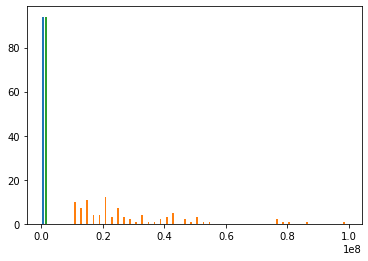

In [99]:
df_to_plot = jumlah_like_df[(jumlah_like_df['Likes']>10000000) & (jumlah_like_df['Likes']<100000000)]

plt.hist(df_to_plot, bins=50)
plt.show()

## 2. People who post the most

In [587]:
df.groupby(['User uuid']).count().sort_values(by='Likes', ascending=False)

,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
User uuid,,,,,,,,,,,,
545,200,200,200,200,200,200,200,200,200,200,200,200
671,200,200,200,200,200,200,200,200,200,200,200,200
651,200,200,200,200,200,200,200,200,200,200,200,200
652,200,200,200,200,200,200,200,200,200,200,200,200
653,200,200,200,200,200,200,200,200,200,200,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...
621,20,20,20,20,20,20,20,20,20,20,20,20
780,20,20,20,20,20,20,20,20,20,20,20,20
265,20,20,20,20,20,20,20,20,20,20,20,20


### This is the histogram of post count
700-ist people send 200 posts

(array([ 20.,  25.,   8.,  11.,   4.,  14.,  13.,   9.,  12.,   7.,  13.,
          8.,   5.,  11.,   2.,   7.,   8.,   5.,   4.,   7.,   7.,   6.,
          6.,   8.,   4.,   9.,   5.,   8.,   4.,   8.,   9.,   4.,   3.,
          7.,   7.,   3.,   5.,   5.,  10.,   2.,   5.,   4.,   1.,   4.,
          1.,   7.,   8.,   3.,   4., 739.]),
 array([ 20. ,  23.6,  27.2,  30.8,  34.4,  38. ,  41.6,  45.2,  48.8,
         52.4,  56. ,  59.6,  63.2,  66.8,  70.4,  74. ,  77.6,  81.2,
         84.8,  88.4,  92. ,  95.6,  99.2, 102.8, 106.4, 110. , 113.6,
        117.2, 120.8, 124.4, 128. , 131.6, 135.2, 138.8, 142.4, 146. ,
        149.6, 153.2, 156.8, 160.4, 164. , 167.6, 171.2, 174.8, 178.4,
        182. , 185.6, 189.2, 192.8, 196.4, 200. ]),
 <BarContainer object of 50 artists>)

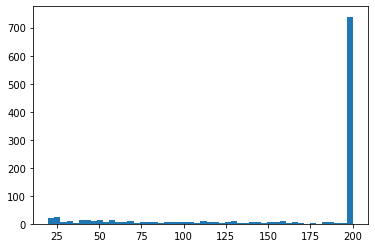

In [589]:
plt.hist(df.groupby(['User uuid']).count()['Likes'], bins=50)

### Is the people who send many posts also get many likes?

In [590]:
jumlah_post_df = df.groupby(['User uuid']).count()['Likes'].reset_index()
jumlah_like_df = df.groupby(['User uuid'])['Likes'].sum().reset_index()
jumlah_like_perpost = (jumlah_like_df['Likes'] / jumlah_post_df['Likes']).reset_index()
jumlah_like_perpost[jumlah_like_perpost['Likes'] > 39000].shape[0]

136

People who got likes more likes than average likes that people get is 136

In [175]:
jumlah_like_df['Hasil pembagian'] = df['Likes'] / df['Likes Score']

In [ ]:
from datetime import datetime

# dalam 1 hari ada postingan berapa biji?

# prototyping: date_object = datetime.strptime('Jun 1 2005  21:18:39', '%b %d %Y %H:%M:%S').date()

df['Formatted Date Posted'] = df.apply(lambda x: datetime.strptime(x['Date Posted'], '%Y-%m-%d  %H:%M:%S').date(), axis=1)
df_grouped = df.groupby(['Formatted Date Posted']).agg({'Type':'count', 'Numer of Comments':'mean', 'Likes':'min'}).reset_index().rename(columns={'Type':'Post_count'})

# dalam 1 hari ada postingan berapa biji -> urutkan berdasarkan post count

df_grouped.sort_values(['Post_count'], ascending=False)

## 3. On what month people usually send post the most?

In [ ]:
# cari tau di bulan berapa paling banyak orang posting

df_grouped = df.groupby(['Month']).Type.count().reset_index().rename(columns={'Type':'Posting Count'})
df_final = df_grouped[df_grouped['Posting Count'] == df_grouped['Posting Count'].max()]

df_final

In [520]:
df[df['Days passed from post'] == 1].sort_values(['Days passed from post', 'User uuid']).head(50)

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute,Formatted Date Posted
163478,1000,638,1,0.29,Image,7,31,2021-02-26 18:24:35,2021,2,26,18,24,2021-02-26
163479,1000,1141,1,0.52,Image,6,46,2021-02-26 02:40:12,2021,2,26,2,40,2021-02-26
163480,1000,965,1,0.44,Images,3,30,2021-02-25 23:39:44,2021,2,25,23,39,2021-02-25
163481,1000,682,1,0.31,Images,12,13,2021-02-25 22:44:26,2021,2,25,22,44,2021-02-25
163919,1003,138,1,0.17,Image,4,0,2021-02-26 20:45:35,2021,2,26,20,45,2021-02-26
163920,1003,183,1,0.23,Image,6,3,2021-02-26 18:53:26,2021,2,26,18,53,2021-02-26
163921,1003,228,1,0.28,Image,6,1,2021-02-26 16:12:15,2021,2,26,16,12,2021-02-26
164307,1005,14,1,0.44,Images,0,1,2021-02-26 03:21:22,2021,2,26,3,21,2021-02-26
164582,1007,9515,1,0.59,Video,0,222,2021-02-26 21:38:16,2021,2,26,21,38,2021-02-26
164583,1007,9893,1,0.61,Video,0,431,2021-02-26 08:57:41,2021,2,26,8,57,2021-02-26


## 4. Is good for posting post sequential? Based on like score

In [460]:
%%time
df_sorted = df.sort_values(['User uuid', 'Date Posted']) #urutkan berdasarkan uuid yg sama, rekomendasi perubahan: df_sorted = df.sort_values(['User uuid', 'Date Posted']) --> rasanya ini ga perlu
df_group = df_sorted.groupby(['User uuid', 'Year', 'Month', 'Day'])['Likes Score'].mean().reset_index()

# aneh, alergi dapet float????
df_group['Date Posted'] = df_group[['Year', 'Month', 'Day']].apply(lambda x: datetime.datetime(year=x['Year'], month=x['Month'], day=x['Day']), axis =1) #ubah tipe string jadi datetime

df_group['Tomorrow'] = df_group.apply(lambda x: x['Date Posted'] + datetime.timedelta(days=1), axis=1) 
df_group['Yesterday'] = df_group.apply(lambda x: x['Date Posted'] - datetime.timedelta(days=1), axis=1)
df_group['Date Posted Bawahnya'] = df_group['Date Posted'].shift(-1)

df_group['Date Posted Atasnya'] = df_group['Date Posted'].shift(1)

df_berurutan = df_group[(df_group['Tomorrow'] == df_group['Date Posted Bawahnya']) | (df_group['Yesterday'] == df_group['Date Posted Atasnya'])] #munculin yg berurutan aja

# create index_berurutan to membedakan baris2 yang sebetulnya masih berurutan dan tidak
Date_Posted_array = df_berurutan['Date Posted'].values

index_berurutan = []
index = 0

for i in range(len(Date_Posted_array)):
    if i != 0: # baris kedua dan seterusnya
        #if i+1 < len(Date_Posted_array):
            if Date_Posted_array[i] != pd.to_datetime(Date_Posted_array[i-1]) + datetime.timedelta(days=1):
                index += 1
    index_berurutan.append(index)
    
df_berurutan['index_berurutan'] = index_berurutan

df_berurutan['Next_day_Likes_Score'] = df_berurutan['Likes Score'].shift(-1)
df_berurutan['Next_day_growth_Likes_Score'] = df_berurutan['Next_day_Likes_Score'] - df_berurutan['Likes Score']
df_berurutan_removelast = df_berurutan[df_berurutan['Tomorrow']==df_berurutan['Date Posted Bawahnya']]
df_berurutan

df_berurutan_grouped = df_berurutan_removelast.groupby(['index_berurutan']).Next_day_growth_Likes_Score.sum()

(df_berurutan_grouped < 0).reset_index(drop=True).value_counts(normalize=True)

CPU times: user 11.9 s, sys: 121 ms, total: 12.1 s
Wall time: 12.2 s


<timed exec>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


False    0.528852
True     0.471148
Name: Next_day_growth_Likes_Score, dtype: float64

In [510]:
df_berurutan_like_score_mean = df_berurutan.groupby(['User uuid','index_berurutan'])['Likes Score'].mean().reset_index()
df_berurutan_like_score_mean= df_berurutan.groupby(['User uuid'])['Likes Score'].mean().reset_index()
berururtan_mean = df_berurutan_like_score_mean.mean()

In [514]:
df_tidak_berurutan = df_group[(df_group['Tomorrow'] != df_group['Date Posted Bawahnya']) & (df_group['Yesterday'] != df_group['Date Posted Atasnya'])]
df_tidak_berurutan = df_tidak_berurutan.groupby(['User uuid'])['Likes Score'].mean().reset_index()
tidak_berurutan_mean = df_tidak_berurutan.mean()
tidak_berurutan_mean['Likes Score']

0.3117048320835859

df_berurutan_like_score_mean < df_tidak_berurutan

In [473]:
display('df_tidak_berurutan', 'df_berurutan_like_score_mean', "pd.merge(df_tidak_berurutan, df_berurutan_like_score_mean, on='User uuid')")

'df_tidak_berurutan'

'df_berurutan_like_score_mean'

"pd.merge(df_tidak_berurutan, df_berurutan_like_score_mean, on='User uuid')"

In [477]:
df_comparison = pd.merge(df_tidak_berurutan, df_berurutan_like_score_mean, on='User uuid')

In [ ]:
df_comparison['tidak_urutan_win'] = df_comparison['Likes Score_x'] > df_comparison['Likes Score_y']
df_comparison
mean= (berururtan_mean['Likes Score'] - tidak_berurutan_mean['Likes Score'])/ tidak_berurutan_mean['Likes Score']
mean

-0.08819433835723342

### Insight: if we send post sequentientially for at least two days, we will get lost like scores for 8%

In [607]:
df['day_passed_related_likes_score'] = (df['Likes']/df['Days passed from post'] - df['Likes Score'] <= 0.1)
df['day_passed_related_likes_score'].value_counts()

False    140896
True      38026
Name: day_passed_related_likes_score, dtype: int64

From this calculation, I found that likes score didn't related to likes and days passed form post 